In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [366]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### Load data

In [292]:
fnames = [r'/data/new_trap/20191107/Bead1/DMdata2/Discharge_{}.h5'.format(i) for i in range(100, 130)]
DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

In [410]:
fnames = [r'/home/data_transfer/data_from_windows/20191114/Bead1/DMdata_X_8/Discharge_{}.h5'.format(i) for i in range(0,120)]
DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

In [428]:
np.std(DManalyzer.BDFs[50].response_at_freq2('x', drive_freq=153))

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


0.032092755281925595

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


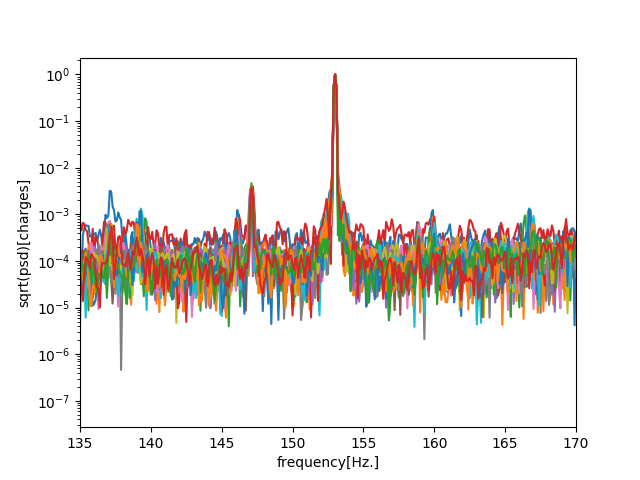

[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (135, 170),
 Text(0.5, 0, 'frequency[Hz.]')]

In [425]:
_,ax = plt.subplots()
for bb in DManalyzer.BDFs[::5]:
    fft3, freq3 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax.semilogy(freq3, np.sqrt(fft3))
ax.set(xlim=(135,170), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  14.149892655634302
x3 noise rms:  3.7382370278318207


../../../../nadavp/new_trap/Tools/StatFramework/likelihood_calculator/dm_search.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 2, figsize=(9.5, 4))


<IPython.core.display.Javascript object>


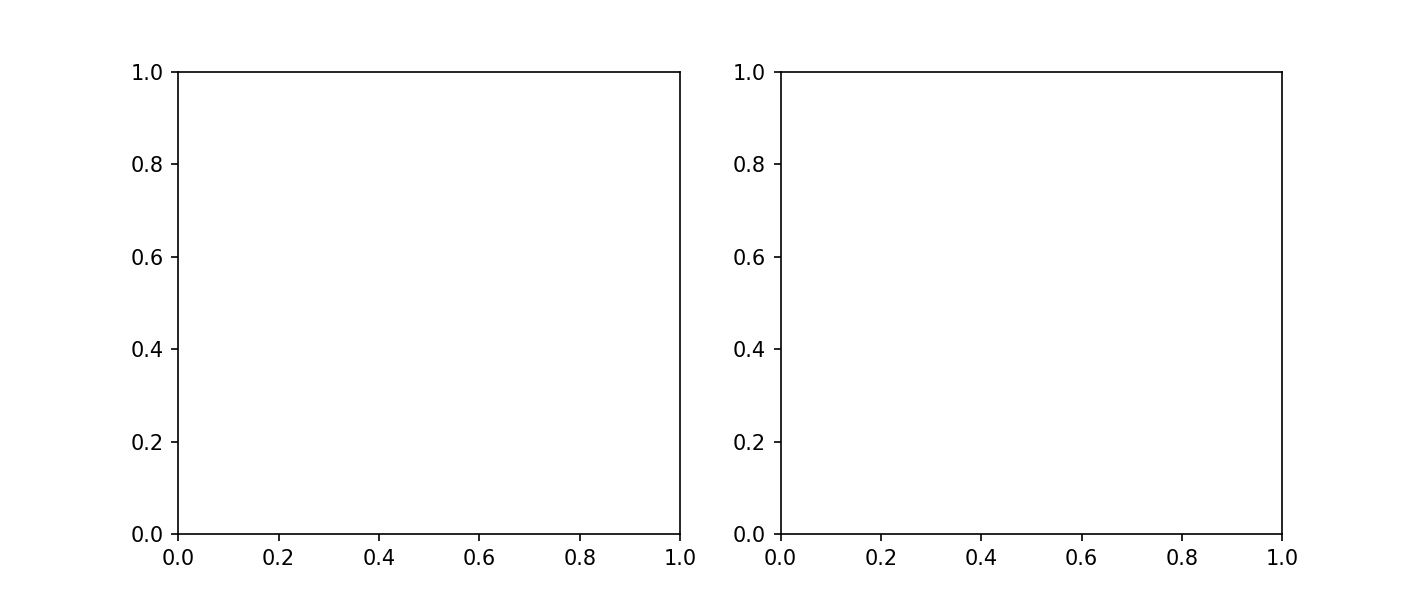

ValueError: x and y must have same first dimension, but have shapes (300000,) and (50000,)

In [411]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3
DManalyzer.plot_dataset(100)  # plot one dataset

In [412]:
# DManalyzer.get_delta_alpha(bdf_i=3, alpha_frequency=1)
DManalyzer.get_delta_alpha(bdf_i=100, alpha_frequency=1, frequency=153)

***************************************************
bdf_i:  100 , AM frequency:  1
sensitivity:  4.02e-04


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(0.00040175142906800893, <iminuit._libiminuit.Minuit at 0x1e13e2728>)

In [398]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  12.649497502316496
x3 noise rms:  3.3328755461197384
***************************************************
bdf_i:  0 , AM frequency:  1
sensitivity:  3.94e-04
***************************************************
bdf_i:  1 , AM frequency:  1
sensitivity:  3.74e-04
***************************************************
bdf_i:  2 , AM frequency:  1
sensitivity:  1.86e-04
***************************************************
bdf_i:  3 , AM frequency:  1
sensitivity:  4.03e-04
***************************************************
bdf_i:  4 , AM frequency:  1
sensitivity:  6.36e-04
***************************************************
bdf_i:  5 , AM frequency:  1
sensitivity:  1.51e-04
***************************************************
bdf_i:  6 , AM frequency:  1
sensitivity:  3.51e-04
***************************************************
bdf_i:  7 , AM frequency:  1
sensitivity:  7.45e-04
***************************************************
bdf_i:  8 , AM frequency:  1
sensitivity:  5.10e

***************************************************
bdf_i:  79 , AM frequency:  1
sensitivity:  7.18e-04
***************************************************
bdf_i:  80 , AM frequency:  1
sensitivity:  4.84e-04
***************************************************
bdf_i:  81 , AM frequency:  1
sensitivity:  2.83e-04
***************************************************
bdf_i:  82 , AM frequency:  1
sensitivity:  5.19e-04
***************************************************
bdf_i:  83 , AM frequency:  1
sensitivity:  1.05e-03
***************************************************
bdf_i:  84 , AM frequency:  1
sensitivity:  6.77e-04
***************************************************
bdf_i:  85 , AM frequency:  1
sensitivity:  5.91e-05
***************************************************
bdf_i:  86 , AM frequency:  1
sensitivity:  1.95e-04
***************************************************
bdf_i:  87 , AM frequency:  1
sensitivity:  7.88e-05
***************************************************
bdf

In [318]:
limit_1Hz

0.00010352873457893447

In [401]:
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


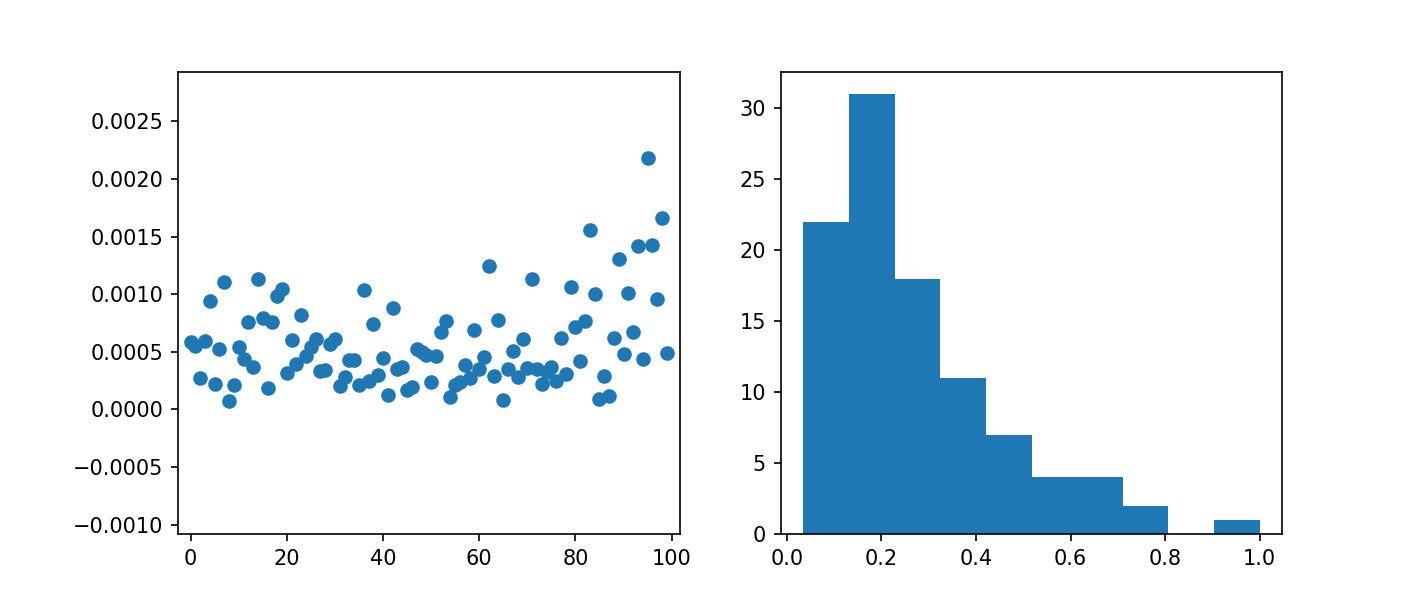

(array([22., 31., 18., 11.,  7.,  4.,  4.,  2.,  0.,  1.]),
 array([0.03506401, 0.13155746, 0.22805091, 0.32454436, 0.42103781,
        0.51753126, 0.61402471, 0.71051817, 0.80701162, 0.90350507,
        0.99999852]),
 <a list of 10 Patch objects>)

In [403]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[1].hist(A)

In [359]:
alphas_freq = np.logspace(-3, 0.7, 80)
limit = [DManalyzer.get_sensitivity(alpha_frequency=freq) for freq in alphas_freq]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  0.001
sensitivity:  1.04e-02
***************************************************
bdf_i:  1 , AM frequency:  0.001
sensitivity:  6.01e-03
***************************************************
bdf_i:  2 , AM frequency:  0.001
sensitivity:  1.02e-02
***************************************************
bdf_i:  3 , AM frequency:  0.001
sensitivity:  8.41e-04
***************************************************
bdf_i:  4 , AM frequency:  0.001
sensitivity:  1.00e-02
***************************************************
bdf_i:  5 , AM frequency:  0.001
sensitivity:  9.97e-03
***************************************************
bdf_i:  6 , AM frequency:  0.001
sensitivity:  9.71e-03
***************************************************
bdf_i:  7 , AM frequency:  0.001
sensitivity:  9.82e-03
***************************************************
bdf_i:  8 , AM frequency:  0.001
sensitivity:  9.68e-03
****************************

***************************************************
bdf_i:  15 , AM frequency:  0.0011138724002324456
sensitivity:  4.70e-03
***************************************************
bdf_i:  16 , AM frequency:  0.0011138724002324456
sensitivity:  9.68e-03
***************************************************
bdf_i:  17 , AM frequency:  0.0011138724002324456
sensitivity:  9.93e-03
***************************************************
bdf_i:  18 , AM frequency:  0.0011138724002324456
sensitivity:  9.28e-03
***************************************************
bdf_i:  19 , AM frequency:  0.0011138724002324456
sensitivity:  1.04e-02
***************************************************
bdf_i:  20 , AM frequency:  0.0011138724002324456
sensitivity:  1.05e-02
***************************************************
bdf_i:  21 , AM frequency:  0.0011138724002324456
sensitivity:  1.05e-02
***************************************************
bdf_i:  22 , AM frequency:  0.0011138724002324456
sensitivity:  1.04e-02


***************************************************
bdf_i:  21 , AM frequency:  0.0012407117239995906
sensitivity:  1.05e-02
***************************************************
bdf_i:  22 , AM frequency:  0.0012407117239995906
sensitivity:  1.04e-02
***************************************************
bdf_i:  23 , AM frequency:  0.0012407117239995906
sensitivity:  1.04e-02
***************************************************
bdf_i:  24 , AM frequency:  0.0012407117239995906
sensitivity:  1.01e-02
***************************************************
bdf_i:  25 , AM frequency:  0.0012407117239995906
sensitivity:  9.62e-03
***************************************************
bdf_i:  26 , AM frequency:  0.0012407117239995906
sensitivity:  9.70e-03
***************************************************
bdf_i:  27 , AM frequency:  0.0012407117239995906
sensitivity:  9.23e-03
***************************************************
bdf_i:  28 , AM frequency:  0.0012407117239995906
sensitivity:  5.12e-03


***************************************************
bdf_i:  27 , AM frequency:  0.0013819945460079597
sensitivity:  9.23e-03
***************************************************
bdf_i:  28 , AM frequency:  0.0013819945460079597
sensitivity:  4.63e-03
***************************************************
bdf_i:  29 , AM frequency:  0.0013819945460079597
sensitivity:  9.17e-03
***************************************************
bdf_i:  30 , AM frequency:  0.0013819945460079597
sensitivity:  8.45e-03
***************************************************
bdf_i:  31 , AM frequency:  0.0013819945460079597
sensitivity:  8.33e-03
***************************************************
bdf_i:  32 , AM frequency:  0.0013819945460079597
sensitivity:  8.23e-03
***************************************************
bdf_i:  33 , AM frequency:  0.0013819945460079597
sensitivity:  8.20e-03
***************************************************
bdf_i:  34 , AM frequency:  0.0013819945460079597
sensitivity:  8.40e-03


***************************************************
bdf_i:  33 , AM frequency:  0.0015393655820700365
sensitivity:  8.20e-03
***************************************************
bdf_i:  34 , AM frequency:  0.0015393655820700365
sensitivity:  8.40e-03
***************************************************
bdf_i:  35 , AM frequency:  0.0015393655820700365
sensitivity:  8.73e-03
***************************************************
bdf_i:  36 , AM frequency:  0.0015393655820700365
sensitivity:  9.12e-03
***************************************************
bdf_i:  37 , AM frequency:  0.0015393655820700365
sensitivity:  9.71e-03
***************************************************
bdf_i:  38 , AM frequency:  0.0015393655820700365
sensitivity:  1.02e-02
***************************************************
bdf_i:  39 , AM frequency:  0.0015393655820700365
sensitivity:  1.06e-02
***************************************************
bdf_i:  40 , AM frequency:  0.0015393655820700365
sensitivity:  1.07e-02


***************************************************
bdf_i:  39 , AM frequency:  0.001714656835735567
sensitivity:  1.06e-02
***************************************************
bdf_i:  40 , AM frequency:  0.001714656835735567
sensitivity:  1.07e-02
***************************************************
bdf_i:  41 , AM frequency:  0.001714656835735567
sensitivity:  1.06e-02
***************************************************
bdf_i:  42 , AM frequency:  0.001714656835735567
sensitivity:  1.05e-02
***************************************************
bdf_i:  43 , AM frequency:  0.001714656835735567
sensitivity:  1.21e-03
***************************************************
bdf_i:  44 , AM frequency:  0.001714656835735567
sensitivity:  1.04e-02
***************************************************
bdf_i:  45 , AM frequency:  0.001714656835735567
sensitivity:  7.56e-03
***************************************************
bdf_i:  46 , AM frequency:  0.001714656835735567
sensitivity:  1.02e-02
********

***************************************************
bdf_i:  45 , AM frequency:  0.0019099089251957482
sensitivity:  6.80e-03
***************************************************
bdf_i:  46 , AM frequency:  0.0019099089251957482
sensitivity:  1.02e-02
***************************************************
bdf_i:  47 , AM frequency:  0.0019099089251957482
sensitivity:  4.34e-03
***************************************************
bdf_i:  48 , AM frequency:  0.0019099089251957482
sensitivity:  1.01e-02
***************************************************
bdf_i:  49 , AM frequency:  0.0019099089251957482
sensitivity:  1.22e-03
***************************************************
bdf_i:  50 , AM frequency:  0.0019099089251957482
sensitivity:  9.91e-03
***************************************************
bdf_i:  51 , AM frequency:  0.0019099089251957482
sensitivity:  4.24e-03
***************************************************
bdf_i:  52 , AM frequency:  0.0019099089251957482
sensitivity:  7.65e-03


***************************************************
bdf_i:  50 , AM frequency:  0.0021273948387331583
sensitivity:  9.91e-03
***************************************************
bdf_i:  51 , AM frequency:  0.0021273948387331583
sensitivity:  3.82e-03
***************************************************
bdf_i:  52 , AM frequency:  0.0021273948387331583
sensitivity:  6.89e-03
***************************************************
bdf_i:  53 , AM frequency:  0.0021273948387331583
sensitivity:  9.86e-03
***************************************************
bdf_i:  54 , AM frequency:  0.0021273948387331583
sensitivity:  1.31e-03
***************************************************
bdf_i:  55 , AM frequency:  0.0021273948387331583
sensitivity:  1.00e-02
***************************************************
bdf_i:  56 , AM frequency:  0.0021273948387331583
sensitivity:  6.58e-03
***************************************************
bdf_i:  57 , AM frequency:  0.0021273948387331583
sensitivity:  9.92e-03


***************************************************
bdf_i:  56 , AM frequency:  0.002369646395261822
sensitivity:  5.93e-03
***************************************************
bdf_i:  57 , AM frequency:  0.002369646395261822
sensitivity:  9.92e-03
***************************************************
bdf_i:  58 , AM frequency:  0.002369646395261822
sensitivity:  4.00e-03
***************************************************
bdf_i:  59 , AM frequency:  0.002369646395261822
sensitivity:  3.32e-04
***************************************************
average:  0.0073570128788440275 std:  0.0034391709666076313
standard error:  0.0004439950626143807
***************************************************
bdf_i:  0 , AM frequency:  0.0026394837179924482
sensitivity:  9.91e-03
***************************************************
bdf_i:  1 , AM frequency:  0.0026394837179924482
sensitivity:  2.30e-03
***************************************************
bdf_i:  2 , AM frequency:  0.0026394837179924482
sens

***************************************************
bdf_i:  2 , AM frequency:  0.0029400480643347075
sensitivity:  1.02e-02
***************************************************
bdf_i:  3 , AM frequency:  0.0029400480643347075
sensitivity:  3.60e-04
***************************************************
bdf_i:  4 , AM frequency:  0.0029400480643347075
sensitivity:  1.00e-02
***************************************************
bdf_i:  5 , AM frequency:  0.0029400480643347075
sensitivity:  9.52e-03
***************************************************
bdf_i:  6 , AM frequency:  0.0029400480643347075
sensitivity:  6.16e-03
***************************************************
bdf_i:  7 , AM frequency:  0.0029400480643347075
sensitivity:  9.82e-03
***************************************************
bdf_i:  8 , AM frequency:  0.0029400480643347075
sensitivity:  8.24e-03
***************************************************
bdf_i:  9 , AM frequency:  0.0029400480643347075
sensitivity:  9.58e-03
********

***************************************************
bdf_i:  8 , AM frequency:  0.0032748383942192596
sensitivity:  7.43e-03
***************************************************
bdf_i:  9 , AM frequency:  0.0032748383942192596
sensitivity:  9.58e-03
***************************************************
bdf_i:  10 , AM frequency:  0.0032748383942192596
sensitivity:  8.31e-04
***************************************************
bdf_i:  11 , AM frequency:  0.0032748383942192596
sensitivity:  9.68e-03
***************************************************
bdf_i:  12 , AM frequency:  0.0032748383942192596
sensitivity:  2.53e-03
***************************************************
bdf_i:  13 , AM frequency:  0.0032748383942192596
sensitivity:  1.30e-03
***************************************************
bdf_i:  14 , AM frequency:  0.0032748383942192596
sensitivity:  1.15e-03
***************************************************
bdf_i:  15 , AM frequency:  0.0032748383942192596
sensitivity:  1.68e-03
**

***************************************************
bdf_i:  14 , AM frequency:  0.0036477521025423745
sensitivity:  1.03e-03
***************************************************
bdf_i:  15 , AM frequency:  0.0036477521025423745
sensitivity:  1.53e-03
***************************************************
bdf_i:  16 , AM frequency:  0.0036477521025423745
sensitivity:  3.31e-03
***************************************************
bdf_i:  17 , AM frequency:  0.0036477521025423745
sensitivity:  3.79e-03
***************************************************
bdf_i:  18 , AM frequency:  0.0036477521025423745
sensitivity:  2.89e-03
***************************************************
bdf_i:  19 , AM frequency:  0.0036477521025423745
sensitivity:  1.04e-02
***************************************************
bdf_i:  20 , AM frequency:  0.0036477521025423745
sensitivity:  1.05e-02
***************************************************
bdf_i:  21 , AM frequency:  0.0036477521025423745
sensitivity:  1.05e-02


***************************************************
bdf_i:  20 , AM frequency:  0.004063130389911829
sensitivity:  1.05e-02
***************************************************
bdf_i:  21 , AM frequency:  0.004063130389911829
sensitivity:  1.05e-02
***************************************************
bdf_i:  22 , AM frequency:  0.004063130389911829
sensitivity:  1.04e-02
***************************************************
bdf_i:  23 , AM frequency:  0.004063130389911829
sensitivity:  1.04e-02
***************************************************
bdf_i:  24 , AM frequency:  0.004063130389911829
sensitivity:  1.01e-02
***************************************************
bdf_i:  25 , AM frequency:  0.004063130389911829
sensitivity:  9.62e-03
***************************************************
bdf_i:  26 , AM frequency:  0.004063130389911829
sensitivity:  9.70e-03
***************************************************
bdf_i:  27 , AM frequency:  0.004063130389911829
sensitivity:  9.23e-03
********

***************************************************
bdf_i:  26 , AM frequency:  0.004525808799868481
sensitivity:  9.70e-03
***************************************************
bdf_i:  27 , AM frequency:  0.004525808799868481
sensitivity:  9.23e-03
***************************************************
bdf_i:  28 , AM frequency:  0.004525808799868481
sensitivity:  2.02e-03
***************************************************
bdf_i:  29 , AM frequency:  0.004525808799868481
sensitivity:  9.17e-03
***************************************************
bdf_i:  30 , AM frequency:  0.004525808799868481
sensitivity:  8.45e-03
***************************************************
bdf_i:  31 , AM frequency:  0.004525808799868481
sensitivity:  8.33e-03
***************************************************
bdf_i:  32 , AM frequency:  0.004525808799868481
sensitivity:  8.23e-03
***************************************************
bdf_i:  33 , AM frequency:  0.004525808799868481
sensitivity:  8.20e-03
********

***************************************************
bdf_i:  32 , AM frequency:  0.005041173510902634
sensitivity:  7.51e-03
***************************************************
bdf_i:  33 , AM frequency:  0.005041173510902634
sensitivity:  8.20e-03
***************************************************
bdf_i:  34 , AM frequency:  0.005041173510902634
sensitivity:  8.40e-03
***************************************************
bdf_i:  35 , AM frequency:  0.005041173510902634
sensitivity:  8.73e-03
***************************************************
bdf_i:  36 , AM frequency:  0.005041173510902634
sensitivity:  9.12e-03
***************************************************
bdf_i:  37 , AM frequency:  0.005041173510902634
sensitivity:  9.71e-03
***************************************************
bdf_i:  38 , AM frequency:  0.005041173510902634
sensitivity:  1.02e-02
***************************************************
bdf_i:  39 , AM frequency:  0.005041173510902634
sensitivity:  1.06e-02
********

***************************************************
bdf_i:  38 , AM frequency:  0.005615224038577342
sensitivity:  1.02e-02
***************************************************
bdf_i:  39 , AM frequency:  0.005615224038577342
sensitivity:  1.06e-02
***************************************************
bdf_i:  40 , AM frequency:  0.005615224038577342
sensitivity:  1.07e-02
***************************************************
bdf_i:  41 , AM frequency:  0.005615224038577342
sensitivity:  1.06e-02
***************************************************
bdf_i:  42 , AM frequency:  0.005615224038577342
sensitivity:  1.05e-02
***************************************************
bdf_i:  43 , AM frequency:  0.005615224038577342
sensitivity:  3.48e-04
***************************************************
bdf_i:  44 , AM frequency:  0.005615224038577342
sensitivity:  1.04e-02
***************************************************
bdf_i:  45 , AM frequency:  0.005615224038577342
sensitivity:  2.60e-03
********

***************************************************
bdf_i:  44 , AM frequency:  0.00625464307769307
sensitivity:  1.04e-02
***************************************************
bdf_i:  45 , AM frequency:  0.00625464307769307
sensitivity:  2.44e-03
***************************************************
bdf_i:  46 , AM frequency:  0.00625464307769307
sensitivity:  7.11e-03
***************************************************
bdf_i:  47 , AM frequency:  0.00625464307769307
sensitivity:  1.84e-03
***************************************************
bdf_i:  48 , AM frequency:  0.00625464307769307
sensitivity:  9.30e-03
***************************************************
bdf_i:  49 , AM frequency:  0.00625464307769307
sensitivity:  7.79e-04
***************************************************
bdf_i:  50 , AM frequency:  0.00625464307769307
sensitivity:  6.17e-03
***************************************************
bdf_i:  51 , AM frequency:  0.00625464307769307
sensitivity:  1.49e-03
****************

***************************************************
bdf_i:  50 , AM frequency:  0.006966874297547237
sensitivity:  5.65e-03
***************************************************
bdf_i:  51 , AM frequency:  0.006966874297547237
sensitivity:  1.39e-03
***************************************************
bdf_i:  52 , AM frequency:  0.006966874297547237
sensitivity:  2.43e-03
***************************************************
bdf_i:  53 , AM frequency:  0.006966874297547237
sensitivity:  3.45e-03
***************************************************
bdf_i:  54 , AM frequency:  0.006966874297547237
sensitivity:  5.55e-04
***************************************************
bdf_i:  55 , AM frequency:  0.006966874297547237
sensitivity:  6.58e-03
***************************************************
bdf_i:  56 , AM frequency:  0.006966874297547237
sensitivity:  2.46e-03
***************************************************
bdf_i:  57 , AM frequency:  0.006966874297547237
sensitivity:  9.92e-03
********

***************************************************
bdf_i:  56 , AM frequency:  0.007760208995926675
sensitivity:  2.35e-03
***************************************************
bdf_i:  57 , AM frequency:  0.007760208995926675
sensitivity:  9.92e-03
***************************************************
bdf_i:  58 , AM frequency:  0.007760208995926675
sensitivity:  1.88e-03
***************************************************
bdf_i:  59 , AM frequency:  0.007760208995926675
sensitivity:  1.50e-03
***************************************************
average:  0.005672427141901326 std:  0.003600842664598618
standard error:  0.0004648667890767862
***************************************************
bdf_i:  0 , AM frequency:  0.008643882620598271
sensitivity:  4.63e-03
***************************************************
bdf_i:  1 , AM frequency:  0.008643882620598271
sensitivity:  1.17e-03
***************************************************
bdf_i:  2 , AM frequency:  0.008643882620598271
sensitivi

***************************************************
bdf_i:  2 , AM frequency:  0.009628182281933318
sensitivity:  4.84e-03
***************************************************
bdf_i:  3 , AM frequency:  0.009628182281933318
sensitivity:  7.82e-04
***************************************************
bdf_i:  4 , AM frequency:  0.009628182281933318
sensitivity:  6.10e-03
***************************************************
bdf_i:  5 , AM frequency:  0.009628182281933318
sensitivity:  4.09e-03
***************************************************
bdf_i:  6 , AM frequency:  0.009628182281933318
sensitivity:  3.70e-03
***************************************************
bdf_i:  7 , AM frequency:  0.009628182281933318
sensitivity:  5.89e-03
***************************************************
bdf_i:  8 , AM frequency:  0.009628182281933318
sensitivity:  3.92e-03
***************************************************
bdf_i:  9 , AM frequency:  0.009628182281933318
sensitivity:  6.59e-03
****************

***************************************************
bdf_i:  8 , AM frequency:  0.010724566508252573
sensitivity:  4.28e-03
***************************************************
bdf_i:  9 , AM frequency:  0.010724566508252573
sensitivity:  6.53e-03
***************************************************
bdf_i:  10 , AM frequency:  0.010724566508252573
sensitivity:  1.83e-03
***************************************************
bdf_i:  11 , AM frequency:  0.010724566508252573
sensitivity:  5.81e-03
***************************************************
bdf_i:  12 , AM frequency:  0.010724566508252573
sensitivity:  9.86e-04
***************************************************
bdf_i:  13 , AM frequency:  0.010724566508252573
sensitivity:  9.15e-04
***************************************************
bdf_i:  14 , AM frequency:  0.010724566508252573
sensitivity:  1.97e-03
***************************************************
bdf_i:  15 , AM frequency:  0.010724566508252573
sensitivity:  2.31e-03
**********

***************************************************
bdf_i:  14 , AM frequency:  0.0119457986379998
sensitivity:  2.39e-03
***************************************************
bdf_i:  15 , AM frequency:  0.0119457986379998
sensitivity:  2.75e-03
***************************************************
bdf_i:  16 , AM frequency:  0.0119457986379998
sensitivity:  1.81e-03
***************************************************
bdf_i:  17 , AM frequency:  0.0119457986379998
sensitivity:  1.70e-03
***************************************************
bdf_i:  18 , AM frequency:  0.0119457986379998
sensitivity:  9.66e-04
***************************************************
bdf_i:  19 , AM frequency:  0.0119457986379998
sensitivity:  1.04e-02
***************************************************
bdf_i:  20 , AM frequency:  0.0119457986379998
sensitivity:  8.76e-03
***************************************************
bdf_i:  21 , AM frequency:  0.0119457986379998
sensitivity:  8.37e-03
************************

***************************************************
bdf_i:  20 , AM frequency:  0.013306095401602321
sensitivity:  8.31e-03
***************************************************
bdf_i:  21 , AM frequency:  0.013306095401602321
sensitivity:  8.40e-03
***************************************************
bdf_i:  22 , AM frequency:  0.013306095401602321
sensitivity:  6.84e-03
***************************************************
bdf_i:  23 , AM frequency:  0.013306095401602321
sensitivity:  1.04e-02
***************************************************
bdf_i:  24 , AM frequency:  0.013306095401602321
sensitivity:  1.01e-02
***************************************************
bdf_i:  25 , AM frequency:  0.013306095401602321
sensitivity:  9.62e-03
***************************************************
bdf_i:  26 , AM frequency:  0.013306095401602321
sensitivity:  9.70e-03
***************************************************
bdf_i:  27 , AM frequency:  0.013306095401602321
sensitivity:  9.23e-03
********

***************************************************
bdf_i:  26 , AM frequency:  0.014821292422704692
sensitivity:  9.70e-03
***************************************************
bdf_i:  27 , AM frequency:  0.014821292422704692
sensitivity:  9.23e-03
***************************************************
bdf_i:  28 , AM frequency:  0.014821292422704692
sensitivity:  7.51e-03
***************************************************
bdf_i:  29 , AM frequency:  0.014821292422704692
sensitivity:  9.17e-03
***************************************************
bdf_i:  30 , AM frequency:  0.014821292422704692
sensitivity:  8.45e-03
***************************************************
bdf_i:  31 , AM frequency:  0.014821292422704692
sensitivity:  8.33e-03
***************************************************
bdf_i:  32 , AM frequency:  0.014821292422704692
sensitivity:  8.23e-03
***************************************************
bdf_i:  33 , AM frequency:  0.014821292422704692
sensitivity:  8.20e-03
********

***************************************************
bdf_i:  32 , AM frequency:  0.016509028565425042
sensitivity:  8.23e-03
***************************************************
bdf_i:  33 , AM frequency:  0.016509028565425042
sensitivity:  8.20e-03
***************************************************
bdf_i:  34 , AM frequency:  0.016509028565425042
sensitivity:  8.40e-03
***************************************************
bdf_i:  35 , AM frequency:  0.016509028565425042
sensitivity:  8.73e-03
***************************************************
bdf_i:  36 , AM frequency:  0.016509028565425042
sensitivity:  9.12e-03
***************************************************
bdf_i:  37 , AM frequency:  0.016509028565425042
sensitivity:  9.71e-03
***************************************************
bdf_i:  38 , AM frequency:  0.016509028565425042
sensitivity:  1.02e-02
***************************************************
bdf_i:  39 , AM frequency:  0.016509028565425042
sensitivity:  5.62e-03
********

***************************************************
bdf_i:  38 , AM frequency:  0.01838895127367601
sensitivity:  1.02e-02
***************************************************
bdf_i:  39 , AM frequency:  0.01838895127367601
sensitivity:  4.52e-03
***************************************************
bdf_i:  40 , AM frequency:  0.01838895127367601
sensitivity:  1.07e-02
***************************************************
bdf_i:  41 , AM frequency:  0.01838895127367601
sensitivity:  1.06e-02
***************************************************
bdf_i:  42 , AM frequency:  0.01838895127367601
sensitivity:  7.05e-03
***************************************************
bdf_i:  43 , AM frequency:  0.01838895127367601
sensitivity:  6.56e-04
***************************************************
bdf_i:  44 , AM frequency:  0.01838895127367601
sensitivity:  9.98e-03
***************************************************
bdf_i:  45 , AM frequency:  0.01838895127367601
sensitivity:  3.63e-03
****************

***************************************************
bdf_i:  44 , AM frequency:  0.020482945292966983
sensitivity:  8.49e-03
***************************************************
bdf_i:  45 , AM frequency:  0.020482945292966983
sensitivity:  3.13e-03
***************************************************
bdf_i:  46 , AM frequency:  0.020482945292966983
sensitivity:  4.74e-03
***************************************************
bdf_i:  47 , AM frequency:  0.020482945292966983
sensitivity:  5.69e-03
***************************************************
bdf_i:  48 , AM frequency:  0.020482945292966983
sensitivity:  3.51e-03
***************************************************
bdf_i:  49 , AM frequency:  0.020482945292966983
sensitivity:  2.91e-03
***************************************************
bdf_i:  50 , AM frequency:  0.020482945292966983
sensitivity:  2.08e-03
***************************************************
bdf_i:  51 , AM frequency:  0.020482945292966983
sensitivity:  1.27e-03
********

***************************************************
bdf_i:  50 , AM frequency:  0.022815387437307016
sensitivity:  3.30e-03
***************************************************
bdf_i:  51 , AM frequency:  0.022815387437307016
sensitivity:  1.00e-03
***************************************************
bdf_i:  52 , AM frequency:  0.022815387437307016
sensitivity:  8.53e-04
***************************************************
bdf_i:  53 , AM frequency:  0.022815387437307016
sensitivity:  2.57e-03
***************************************************
bdf_i:  54 , AM frequency:  0.022815387437307016
sensitivity:  1.72e-03
***************************************************
bdf_i:  55 , AM frequency:  0.022815387437307016
sensitivity:  5.52e-03
***************************************************
bdf_i:  56 , AM frequency:  0.022815387437307016
sensitivity:  1.55e-03
***************************************************
bdf_i:  57 , AM frequency:  0.022815387437307016
sensitivity:  6.05e-03
********

***************************************************
bdf_i:  56 , AM frequency:  0.025413430367026365
sensitivity:  7.88e-04
***************************************************
bdf_i:  57 , AM frequency:  0.025413430367026365
sensitivity:  2.86e-03
***************************************************
bdf_i:  58 , AM frequency:  0.025413430367026365
sensitivity:  1.32e-03
***************************************************
bdf_i:  59 , AM frequency:  0.025413430367026365
sensitivity:  6.61e-03
***************************************************
average:  0.004544285639360744 std:  0.0031417950853169945
standard error:  0.0004056040014209677
***************************************************
bdf_i:  0 , AM frequency:  0.028307318681059793
sensitivity:  1.99e-03
***************************************************
bdf_i:  1 , AM frequency:  0.028307318681059793
sensitivity:  1.22e-03
***************************************************
bdf_i:  2 , AM frequency:  0.028307318681059793
sensitiv

***************************************************
bdf_i:  2 , AM frequency:  0.03153074100341683
sensitivity:  1.20e-03
***************************************************
bdf_i:  3 , AM frequency:  0.03153074100341683
sensitivity:  3.03e-03
***************************************************
bdf_i:  4 , AM frequency:  0.03153074100341683
sensitivity:  3.78e-03
***************************************************
bdf_i:  5 , AM frequency:  0.03153074100341683
sensitivity:  2.68e-04
***************************************************
bdf_i:  6 , AM frequency:  0.03153074100341683
sensitivity:  1.83e-03
***************************************************
bdf_i:  7 , AM frequency:  0.03153074100341683
sensitivity:  1.86e-03
***************************************************
bdf_i:  8 , AM frequency:  0.03153074100341683
sensitivity:  4.71e-03
***************************************************
bdf_i:  9 , AM frequency:  0.03153074100341683
sensitivity:  2.00e-03
************************

***************************************************
bdf_i:  8 , AM frequency:  0.03512122216258351
sensitivity:  5.10e-03
***************************************************
bdf_i:  9 , AM frequency:  0.03512122216258351
sensitivity:  1.55e-03
***************************************************
bdf_i:  10 , AM frequency:  0.03512122216258351
sensitivity:  1.69e-03
***************************************************
bdf_i:  11 , AM frequency:  0.03512122216258351
sensitivity:  1.87e-03
***************************************************
bdf_i:  12 , AM frequency:  0.03512122216258351
sensitivity:  1.90e-03
***************************************************
bdf_i:  13 , AM frequency:  0.03512122216258351
sensitivity:  7.30e-04
***************************************************
bdf_i:  14 , AM frequency:  0.03512122216258351
sensitivity:  1.36e-03
***************************************************
bdf_i:  15 , AM frequency:  0.03512122216258351
sensitivity:  3.19e-03
******************

***************************************************
bdf_i:  14 , AM frequency:  0.03912056002933388
sensitivity:  2.53e-03
***************************************************
bdf_i:  15 , AM frequency:  0.03912056002933388
sensitivity:  4.52e-03
***************************************************
bdf_i:  16 , AM frequency:  0.03912056002933388
sensitivity:  4.65e-04
***************************************************
bdf_i:  17 , AM frequency:  0.03912056002933388
sensitivity:  2.75e-03
***************************************************
bdf_i:  18 , AM frequency:  0.03912056002933388
sensitivity:  1.10e-03
***************************************************
bdf_i:  19 , AM frequency:  0.03912056002933388
sensitivity:  4.06e-03
***************************************************
bdf_i:  20 , AM frequency:  0.03912056002933388
sensitivity:  2.68e-03
***************************************************
bdf_i:  21 , AM frequency:  0.03912056002933388
sensitivity:  7.68e-03
****************

***************************************************
bdf_i:  20 , AM frequency:  0.04357531209831162
sensitivity:  6.56e-03
***************************************************
bdf_i:  21 , AM frequency:  0.04357531209831162
sensitivity:  5.74e-03
***************************************************
bdf_i:  22 , AM frequency:  0.04357531209831162
sensitivity:  5.09e-03
***************************************************
bdf_i:  23 , AM frequency:  0.04357531209831162
sensitivity:  8.01e-03
***************************************************
bdf_i:  24 , AM frequency:  0.04357531209831162
sensitivity:  9.37e-03
***************************************************
bdf_i:  25 , AM frequency:  0.04357531209831162
sensitivity:  1.90e-03
***************************************************
bdf_i:  26 , AM frequency:  0.04357531209831162
sensitivity:  9.35e-03
***************************************************
bdf_i:  27 , AM frequency:  0.04357531209831162
sensitivity:  9.23e-03
****************

***************************************************
bdf_i:  26 , AM frequency:  0.048537337477824315
sensitivity:  9.70e-03
***************************************************
bdf_i:  27 , AM frequency:  0.048537337477824315
sensitivity:  7.87e-03
***************************************************
bdf_i:  28 , AM frequency:  0.048537337477824315
sensitivity:  2.13e-03
***************************************************
bdf_i:  29 , AM frequency:  0.048537337477824315
sensitivity:  9.17e-03
***************************************************
bdf_i:  30 , AM frequency:  0.048537337477824315
sensitivity:  8.45e-03
***************************************************
bdf_i:  31 , AM frequency:  0.048537337477824315
sensitivity:  8.33e-03
***************************************************
bdf_i:  32 , AM frequency:  0.048537337477824315
sensitivity:  6.15e-03
***************************************************
bdf_i:  33 , AM frequency:  0.048537337477824315
sensitivity:  8.20e-03
********

***************************************************
bdf_i:  32 , AM frequency:  0.0540644005973164
sensitivity:  5.17e-03
***************************************************
bdf_i:  33 , AM frequency:  0.0540644005973164
sensitivity:  4.48e-03
***************************************************
bdf_i:  34 , AM frequency:  0.0540644005973164
sensitivity:  8.40e-03
***************************************************
bdf_i:  35 , AM frequency:  0.0540644005973164
sensitivity:  8.73e-03
***************************************************
bdf_i:  36 , AM frequency:  0.0540644005973164
sensitivity:  9.12e-03
***************************************************
bdf_i:  37 , AM frequency:  0.0540644005973164
sensitivity:  8.83e-03
***************************************************
bdf_i:  38 , AM frequency:  0.0540644005973164
sensitivity:  8.44e-03
***************************************************
bdf_i:  39 , AM frequency:  0.0540644005973164
sensitivity:  2.84e-03
************************

***************************************************
bdf_i:  38 , AM frequency:  0.06022084366046132
sensitivity:  1.08e-03
***************************************************
bdf_i:  39 , AM frequency:  0.06022084366046132
sensitivity:  1.66e-03
***************************************************
bdf_i:  40 , AM frequency:  0.06022084366046132
sensitivity:  5.68e-04
***************************************************
bdf_i:  41 , AM frequency:  0.06022084366046132
sensitivity:  4.12e-03
***************************************************
bdf_i:  42 , AM frequency:  0.06022084366046132
sensitivity:  3.13e-03
***************************************************
bdf_i:  43 , AM frequency:  0.06022084366046132
sensitivity:  1.70e-03
***************************************************
bdf_i:  44 , AM frequency:  0.06022084366046132
sensitivity:  1.23e-03
***************************************************
bdf_i:  45 , AM frequency:  0.06022084366046132
sensitivity:  2.22e-03
****************

***************************************************
bdf_i:  44 , AM frequency:  0.06707833567210093
sensitivity:  9.74e-04
***************************************************
bdf_i:  45 , AM frequency:  0.06707833567210093
sensitivity:  9.78e-04
***************************************************
bdf_i:  46 , AM frequency:  0.06707833567210093
sensitivity:  9.98e-04
***************************************************
bdf_i:  47 , AM frequency:  0.06707833567210093
sensitivity:  3.99e-03
***************************************************
bdf_i:  48 , AM frequency:  0.06707833567210093
sensitivity:  6.75e-04
***************************************************
bdf_i:  49 , AM frequency:  0.06707833567210093
sensitivity:  1.87e-03
***************************************************
bdf_i:  50 , AM frequency:  0.06707833567210093
sensitivity:  2.09e-03
***************************************************
bdf_i:  51 , AM frequency:  0.06707833567210093
sensitivity:  2.53e-03
****************

***************************************************
bdf_i:  50 , AM frequency:  0.07471670675868078
sensitivity:  9.19e-04
***************************************************
bdf_i:  51 , AM frequency:  0.07471670675868078
sensitivity:  3.65e-03
***************************************************
bdf_i:  52 , AM frequency:  0.07471670675868078
sensitivity:  7.30e-04
***************************************************
bdf_i:  53 , AM frequency:  0.07471670675868078
sensitivity:  1.34e-03
***************************************************
bdf_i:  54 , AM frequency:  0.07471670675868078
sensitivity:  1.22e-03
***************************************************
bdf_i:  55 , AM frequency:  0.07471670675868078
sensitivity:  3.34e-03
***************************************************
bdf_i:  56 , AM frequency:  0.07471670675868078
sensitivity:  1.35e-03
***************************************************
bdf_i:  57 , AM frequency:  0.07471670675868078
sensitivity:  2.68e-03
****************

***************************************************
bdf_i:  56 , AM frequency:  0.0832248774947556
sensitivity:  2.02e-03
***************************************************
bdf_i:  57 , AM frequency:  0.0832248774947556
sensitivity:  8.30e-04
***************************************************
bdf_i:  58 , AM frequency:  0.0832248774947556
sensitivity:  2.03e-03
***************************************************
bdf_i:  59 , AM frequency:  0.0832248774947556
sensitivity:  2.83e-03
***************************************************
average:  0.0033191141179246216 std:  0.0023660539548463954
standard error:  0.0003054562521116095
***************************************************
bdf_i:  0 , AM frequency:  0.0927018940541347
sensitivity:  1.16e-03
***************************************************
bdf_i:  1 , AM frequency:  0.0927018940541347
sensitivity:  8.64e-04
***************************************************
bdf_i:  2 , AM frequency:  0.0927018940541347
sensitivity:  2.11e-0

***************************************************
bdf_i:  2 , AM frequency:  0.10325808123617294
sensitivity:  2.03e-03
***************************************************
bdf_i:  3 , AM frequency:  0.10325808123617294
sensitivity:  6.02e-04
***************************************************
bdf_i:  4 , AM frequency:  0.10325808123617294
sensitivity:  1.48e-03
***************************************************
bdf_i:  5 , AM frequency:  0.10325808123617294
sensitivity:  1.80e-03
***************************************************
bdf_i:  6 , AM frequency:  0.10325808123617294
sensitivity:  1.08e-03
***************************************************
bdf_i:  7 , AM frequency:  0.10325808123617294
sensitivity:  6.98e-04
***************************************************
bdf_i:  8 , AM frequency:  0.10325808123617294
sensitivity:  2.03e-03
***************************************************
bdf_i:  9 , AM frequency:  0.10325808123617294
sensitivity:  1.66e-03
************************

***************************************************
bdf_i:  8 , AM frequency:  0.11501632678993282
sensitivity:  2.42e-03
***************************************************
bdf_i:  9 , AM frequency:  0.11501632678993282
sensitivity:  5.85e-04
***************************************************
bdf_i:  10 , AM frequency:  0.11501632678993282
sensitivity:  6.15e-04
***************************************************
bdf_i:  11 , AM frequency:  0.11501632678993282
sensitivity:  1.96e-03
***************************************************
bdf_i:  12 , AM frequency:  0.11501632678993282
sensitivity:  1.40e-03
***************************************************
bdf_i:  13 , AM frequency:  0.11501632678993282
sensitivity:  2.46e-03
***************************************************
bdf_i:  14 , AM frequency:  0.11501632678993282
sensitivity:  6.54e-04
***************************************************
bdf_i:  15 , AM frequency:  0.11501632678993282
sensitivity:  9.96e-04
******************

***************************************************
bdf_i:  14 , AM frequency:  0.1281135119874219
sensitivity:  1.07e-03
***************************************************
bdf_i:  15 , AM frequency:  0.1281135119874219
sensitivity:  5.74e-04
***************************************************
bdf_i:  16 , AM frequency:  0.1281135119874219
sensitivity:  1.69e-03
***************************************************
bdf_i:  17 , AM frequency:  0.1281135119874219
sensitivity:  4.34e-03
***************************************************
bdf_i:  18 , AM frequency:  0.1281135119874219
sensitivity:  1.86e-03
***************************************************
bdf_i:  19 , AM frequency:  0.1281135119874219
sensitivity:  4.35e-03
***************************************************
bdf_i:  20 , AM frequency:  0.1281135119874219
sensitivity:  2.41e-03
***************************************************
bdf_i:  21 , AM frequency:  0.1281135119874219
sensitivity:  5.72e-03
************************

***************************************************
bdf_i:  20 , AM frequency:  0.14270210509963785
sensitivity:  6.52e-04
***************************************************
bdf_i:  21 , AM frequency:  0.14270210509963785
sensitivity:  2.00e-03
***************************************************
bdf_i:  22 , AM frequency:  0.14270210509963785
sensitivity:  1.99e-03
***************************************************
bdf_i:  23 , AM frequency:  0.14270210509963785
sensitivity:  1.72e-03
***************************************************
bdf_i:  24 , AM frequency:  0.14270210509963785
sensitivity:  1.77e-03
***************************************************
bdf_i:  25 , AM frequency:  0.14270210509963785
sensitivity:  2.68e-03
***************************************************
bdf_i:  26 , AM frequency:  0.14270210509963785
sensitivity:  2.93e-03
***************************************************
bdf_i:  27 , AM frequency:  0.14270210509963785
sensitivity:  1.08e-03
****************

***************************************************
bdf_i:  26 , AM frequency:  0.1589519363255565
sensitivity:  6.29e-04
***************************************************
bdf_i:  27 , AM frequency:  0.1589519363255565
sensitivity:  4.49e-03
***************************************************
bdf_i:  28 , AM frequency:  0.1589519363255565
sensitivity:  2.28e-03
***************************************************
bdf_i:  29 , AM frequency:  0.1589519363255565
sensitivity:  1.33e-03
***************************************************
bdf_i:  30 , AM frequency:  0.1589519363255565
sensitivity:  6.76e-03
***************************************************
bdf_i:  31 , AM frequency:  0.1589519363255565
sensitivity:  2.40e-03
***************************************************
bdf_i:  32 , AM frequency:  0.1589519363255565
sensitivity:  1.46e-03
***************************************************
bdf_i:  33 , AM frequency:  0.1589519363255565
sensitivity:  2.34e-03
************************

***************************************************
bdf_i:  32 , AM frequency:  0.17705217483654245
sensitivity:  3.96e-04
***************************************************
bdf_i:  33 , AM frequency:  0.17705217483654245
sensitivity:  2.83e-03
***************************************************
bdf_i:  34 , AM frequency:  0.17705217483654245
sensitivity:  3.67e-03
***************************************************
bdf_i:  35 , AM frequency:  0.17705217483654245
sensitivity:  1.52e-03
***************************************************
bdf_i:  36 , AM frequency:  0.17705217483654245
sensitivity:  3.62e-03
***************************************************
bdf_i:  37 , AM frequency:  0.17705217483654245
sensitivity:  4.59e-03
***************************************************
bdf_i:  38 , AM frequency:  0.17705217483654245
sensitivity:  2.07e-03
***************************************************
bdf_i:  39 , AM frequency:  0.17705217483654245
sensitivity:  1.26e-03
****************

***************************************************
bdf_i:  38 , AM frequency:  0.19721353095155414
sensitivity:  2.10e-03
***************************************************
bdf_i:  39 , AM frequency:  0.19721353095155414
sensitivity:  6.96e-04
***************************************************
bdf_i:  40 , AM frequency:  0.19721353095155414
sensitivity:  1.64e-03
***************************************************
bdf_i:  41 , AM frequency:  0.19721353095155414
sensitivity:  1.15e-03
***************************************************
bdf_i:  42 , AM frequency:  0.19721353095155414
sensitivity:  5.30e-04
***************************************************
bdf_i:  43 , AM frequency:  0.19721353095155414
sensitivity:  2.95e-04
***************************************************
bdf_i:  44 , AM frequency:  0.19721353095155414
sensitivity:  4.02e-04
***************************************************
bdf_i:  45 , AM frequency:  0.19721353095155414
sensitivity:  1.13e-03
****************

***************************************************
bdf_i:  45 , AM frequency:  0.2196707090793235
sensitivity:  1.17e-03
***************************************************
bdf_i:  46 , AM frequency:  0.2196707090793235
sensitivity:  7.61e-04
***************************************************
bdf_i:  47 , AM frequency:  0.2196707090793235
sensitivity:  1.02e-03
***************************************************
bdf_i:  48 , AM frequency:  0.2196707090793235
sensitivity:  3.25e-04
***************************************************
bdf_i:  49 , AM frequency:  0.2196707090793235
sensitivity:  4.19e-04
***************************************************
bdf_i:  50 , AM frequency:  0.2196707090793235
sensitivity:  4.16e-04
***************************************************
bdf_i:  51 , AM frequency:  0.2196707090793235
sensitivity:  1.21e-03
***************************************************
bdf_i:  52 , AM frequency:  0.2196707090793235
sensitivity:  5.66e-04
************************

***************************************************
bdf_i:  51 , AM frequency:  0.24468513998294936
sensitivity:  7.99e-04
***************************************************
bdf_i:  52 , AM frequency:  0.24468513998294936
sensitivity:  6.28e-04
***************************************************
bdf_i:  53 , AM frequency:  0.24468513998294936
sensitivity:  1.97e-04
***************************************************
bdf_i:  54 , AM frequency:  0.24468513998294936
sensitivity:  3.91e-04
***************************************************
bdf_i:  55 , AM frequency:  0.24468513998294936
sensitivity:  1.80e-03
***************************************************
bdf_i:  56 , AM frequency:  0.24468513998294936
sensitivity:  4.21e-05
***************************************************
bdf_i:  57 , AM frequency:  0.24468513998294936
sensitivity:  3.97e-04
***************************************************
bdf_i:  58 , AM frequency:  0.24468513998294936
sensitivity:  5.23e-04
****************

***************************************************
bdf_i:  0 , AM frequency:  0.3035837218653263
sensitivity:  9.33e-04
***************************************************
bdf_i:  1 , AM frequency:  0.3035837218653263
sensitivity:  8.24e-04
***************************************************
bdf_i:  2 , AM frequency:  0.3035837218653263
sensitivity:  1.16e-03
***************************************************
bdf_i:  3 , AM frequency:  0.3035837218653263
sensitivity:  9.59e-04
***************************************************
bdf_i:  4 , AM frequency:  0.3035837218653263
sensitivity:  6.58e-04
***************************************************
bdf_i:  5 , AM frequency:  0.3035837218653263
sensitivity:  4.63e-04
***************************************************
bdf_i:  6 , AM frequency:  0.3035837218653263
sensitivity:  8.02e-04
***************************************************
bdf_i:  7 , AM frequency:  0.3035837218653263
sensitivity:  5.09e-04
********************************

***************************************************
bdf_i:  9 , AM frequency:  0.3381535289456305
sensitivity:  4.30e-04
***************************************************
bdf_i:  10 , AM frequency:  0.3381535289456305
sensitivity:  7.22e-04
***************************************************
bdf_i:  11 , AM frequency:  0.3381535289456305
sensitivity:  1.05e-03
***************************************************
bdf_i:  12 , AM frequency:  0.3381535289456305
sensitivity:  5.47e-04
***************************************************
bdf_i:  13 , AM frequency:  0.3381535289456305
sensitivity:  1.63e-04
***************************************************
bdf_i:  14 , AM frequency:  0.3381535289456305
sensitivity:  4.30e-04
***************************************************
bdf_i:  15 , AM frequency:  0.3381535289456305
sensitivity:  1.30e-03
***************************************************
bdf_i:  16 , AM frequency:  0.3381535289456305
sensitivity:  4.07e-04
*************************

***************************************************
bdf_i:  16 , AM frequency:  0.3766598829337412
sensitivity:  4.34e-04
***************************************************
bdf_i:  17 , AM frequency:  0.3766598829337412
sensitivity:  3.06e-04
***************************************************
bdf_i:  18 , AM frequency:  0.3766598829337412
sensitivity:  9.61e-04
***************************************************
bdf_i:  19 , AM frequency:  0.3766598829337412
sensitivity:  1.25e-03
***************************************************
bdf_i:  20 , AM frequency:  0.3766598829337412
sensitivity:  1.99e-03
***************************************************
bdf_i:  21 , AM frequency:  0.3766598829337412
sensitivity:  2.76e-04
***************************************************
bdf_i:  22 , AM frequency:  0.3766598829337412
sensitivity:  3.14e-04
***************************************************
bdf_i:  23 , AM frequency:  0.3766598829337412
sensitivity:  2.21e-03
************************

***************************************************
bdf_i:  23 , AM frequency:  0.41955104787467823
sensitivity:  6.90e-04
***************************************************
bdf_i:  24 , AM frequency:  0.41955104787467823
sensitivity:  1.55e-03
***************************************************
bdf_i:  25 , AM frequency:  0.41955104787467823
sensitivity:  3.78e-04
***************************************************
bdf_i:  26 , AM frequency:  0.41955104787467823
sensitivity:  1.60e-03
***************************************************
bdf_i:  27 , AM frequency:  0.41955104787467823
sensitivity:  2.28e-03
***************************************************
bdf_i:  28 , AM frequency:  0.41955104787467823
sensitivity:  1.87e-03
***************************************************
bdf_i:  29 , AM frequency:  0.41955104787467823
sensitivity:  2.13e-03
***************************************************
bdf_i:  30 , AM frequency:  0.41955104787467823
sensitivity:  2.37e-03
****************

***************************************************
bdf_i:  30 , AM frequency:  0.46732633271620605
sensitivity:  7.18e-04
***************************************************
bdf_i:  31 , AM frequency:  0.46732633271620605
sensitivity:  8.12e-04
***************************************************
bdf_i:  32 , AM frequency:  0.46732633271620605
sensitivity:  9.09e-04
***************************************************
bdf_i:  33 , AM frequency:  0.46732633271620605
sensitivity:  1.55e-03
***************************************************
bdf_i:  34 , AM frequency:  0.46732633271620605
sensitivity:  9.85e-04
***************************************************
bdf_i:  35 , AM frequency:  0.46732633271620605
sensitivity:  9.38e-04
***************************************************
bdf_i:  36 , AM frequency:  0.46732633271620605
sensitivity:  1.55e-03
***************************************************
bdf_i:  37 , AM frequency:  0.46732633271620605
sensitivity:  1.84e-03
****************

***************************************************
bdf_i:  38 , AM frequency:  0.5205419039144269
sensitivity:  1.37e-03
***************************************************
bdf_i:  39 , AM frequency:  0.5205419039144269
sensitivity:  4.89e-04
***************************************************
bdf_i:  40 , AM frequency:  0.5205419039144269
sensitivity:  6.69e-04
***************************************************
bdf_i:  41 , AM frequency:  0.5205419039144269
sensitivity:  3.74e-04
***************************************************
bdf_i:  42 , AM frequency:  0.5205419039144269
sensitivity:  2.99e-04
***************************************************
bdf_i:  43 , AM frequency:  0.5205419039144269
sensitivity:  1.43e-04
***************************************************
bdf_i:  44 , AM frequency:  0.5205419039144269
sensitivity:  3.71e-04
***************************************************
bdf_i:  45 , AM frequency:  0.5205419039144269
sensitivity:  1.29e-04
************************

***************************************************
bdf_i:  44 , AM frequency:  0.5798172599347303
sensitivity:  3.40e-04
***************************************************
bdf_i:  45 , AM frequency:  0.5798172599347303
sensitivity:  2.23e-04
***************************************************
bdf_i:  46 , AM frequency:  0.5798172599347303
sensitivity:  3.37e-04
***************************************************
bdf_i:  47 , AM frequency:  0.5798172599347303
sensitivity:  3.16e-04
***************************************************
bdf_i:  48 , AM frequency:  0.5798172599347303
sensitivity:  2.75e-04
***************************************************
bdf_i:  49 , AM frequency:  0.5798172599347303
sensitivity:  6.36e-04
***************************************************
bdf_i:  50 , AM frequency:  0.5798172599347303
sensitivity:  2.83e-04
***************************************************
bdf_i:  51 , AM frequency:  0.5798172599347303
sensitivity:  1.52e-04
************************

***************************************************
bdf_i:  52 , AM frequency:  0.6458424430196978
sensitivity:  2.34e-04
***************************************************
bdf_i:  53 , AM frequency:  0.6458424430196978
sensitivity:  4.02e-04
***************************************************
bdf_i:  54 , AM frequency:  0.6458424430196978
sensitivity:  9.99e-05
***************************************************
bdf_i:  55 , AM frequency:  0.6458424430196978
sensitivity:  2.07e-04
***************************************************
bdf_i:  56 , AM frequency:  0.6458424430196978
sensitivity:  8.36e-05
***************************************************
bdf_i:  57 , AM frequency:  0.6458424430196978
sensitivity:  5.87e-04
***************************************************
bdf_i:  58 , AM frequency:  0.6458424430196978
sensitivity:  5.36e-04
***************************************************
bdf_i:  59 , AM frequency:  0.6458424430196978
sensitivity:  1.82e-04
************************

***************************************************
bdf_i:  59 , AM frequency:  0.7193860721783379
sensitivity:  1.01e-04
***************************************************
average:  0.0003681238690997935 std:  0.0002677941688376805
standard error:  3.457207853732646e-05
***************************************************
bdf_i:  0 , AM frequency:  0.8013042909110767
sensitivity:  3.83e-04
***************************************************
bdf_i:  1 , AM frequency:  0.8013042909110767
sensitivity:  1.62e-04
***************************************************
bdf_i:  2 , AM frequency:  0.8013042909110767
sensitivity:  3.27e-04
***************************************************
bdf_i:  3 , AM frequency:  0.8013042909110767
sensitivity:  2.68e-04
***************************************************
bdf_i:  4 , AM frequency:  0.8013042909110767
sensitivity:  1.64e-04
***************************************************
bdf_i:  5 , AM frequency:  0.8013042909110767
sensitivity:  1.62e-04
*

***************************************************
bdf_i:  6 , AM frequency:  0.8925507338336797
sensitivity:  3.14e-04
***************************************************
bdf_i:  7 , AM frequency:  0.8925507338336797
sensitivity:  1.05e-04
***************************************************
bdf_i:  8 , AM frequency:  0.8925507338336797
sensitivity:  5.11e-05
***************************************************
bdf_i:  9 , AM frequency:  0.8925507338336797
sensitivity:  2.80e-04
***************************************************
bdf_i:  10 , AM frequency:  0.8925507338336797
sensitivity:  1.62e-04
***************************************************
bdf_i:  11 , AM frequency:  0.8925507338336797
sensitivity:  1.59e-04
***************************************************
bdf_i:  12 , AM frequency:  0.8925507338336797
sensitivity:  1.38e-04
***************************************************
bdf_i:  13 , AM frequency:  0.8925507338336797
sensitivity:  4.51e-05
****************************

***************************************************
bdf_i:  14 , AM frequency:  0.9941876282245514
sensitivity:  1.52e-04
***************************************************
bdf_i:  15 , AM frequency:  0.9941876282245514
sensitivity:  3.16e-04
***************************************************
bdf_i:  16 , AM frequency:  0.9941876282245514
sensitivity:  2.14e-04
***************************************************
bdf_i:  17 , AM frequency:  0.9941876282245514
sensitivity:  2.35e-04
***************************************************
bdf_i:  18 , AM frequency:  0.9941876282245514
sensitivity:  1.79e-04
***************************************************
bdf_i:  19 , AM frequency:  0.9941876282245514
sensitivity:  2.83e-04
***************************************************
bdf_i:  20 , AM frequency:  0.9941876282245514
sensitivity:  2.41e-04
***************************************************
bdf_i:  21 , AM frequency:  0.9941876282245514
sensitivity:  5.15e-04
************************

***************************************************
bdf_i:  21 , AM frequency:  1.1073981597318834
sensitivity:  3.10e-04
***************************************************
bdf_i:  22 , AM frequency:  1.1073981597318834
sensitivity:  2.28e-04
***************************************************
bdf_i:  23 , AM frequency:  1.1073981597318834
sensitivity:  4.22e-04
***************************************************
bdf_i:  24 , AM frequency:  1.1073981597318834
sensitivity:  4.12e-04
***************************************************
bdf_i:  25 , AM frequency:  1.1073981597318834
sensitivity:  3.77e-04
***************************************************
bdf_i:  26 , AM frequency:  1.1073981597318834
sensitivity:  1.45e-04
***************************************************
bdf_i:  27 , AM frequency:  1.1073981597318834
sensitivity:  2.64e-04
***************************************************
bdf_i:  28 , AM frequency:  1.1073981597318834
sensitivity:  1.34e-04
************************

***************************************************
bdf_i:  27 , AM frequency:  1.2335002461935474
sensitivity:  5.65e-04
***************************************************
bdf_i:  28 , AM frequency:  1.2335002461935474
sensitivity:  9.33e-04
***************************************************
bdf_i:  29 , AM frequency:  1.2335002461935474
sensitivity:  2.29e-04
***************************************************
bdf_i:  30 , AM frequency:  1.2335002461935474
sensitivity:  1.61e-04
***************************************************
bdf_i:  31 , AM frequency:  1.2335002461935474
sensitivity:  3.99e-04
***************************************************
bdf_i:  32 , AM frequency:  1.2335002461935474
sensitivity:  1.63e-04
***************************************************
bdf_i:  33 , AM frequency:  1.2335002461935474
sensitivity:  3.34e-04
***************************************************
bdf_i:  34 , AM frequency:  1.2335002461935474
sensitivity:  1.00e-04
************************

***************************************************
bdf_i:  34 , AM frequency:  1.3739618799149191
sensitivity:  3.68e-04
***************************************************
bdf_i:  35 , AM frequency:  1.3739618799149191
sensitivity:  3.15e-04
***************************************************
bdf_i:  36 , AM frequency:  1.3739618799149191
sensitivity:  5.45e-04
***************************************************
bdf_i:  37 , AM frequency:  1.3739618799149191
sensitivity:  4.78e-04
***************************************************
bdf_i:  38 , AM frequency:  1.3739618799149191
sensitivity:  1.59e-04
***************************************************
bdf_i:  39 , AM frequency:  1.3739618799149191
sensitivity:  1.74e-04
***************************************************
bdf_i:  40 , AM frequency:  1.3739618799149191
sensitivity:  2.91e-04
***************************************************
bdf_i:  41 , AM frequency:  1.3739618799149191
sensitivity:  1.57e-04
************************

***************************************************
bdf_i:  40 , AM frequency:  1.5304182170087157
sensitivity:  2.20e-04
***************************************************
bdf_i:  41 , AM frequency:  1.5304182170087157
sensitivity:  7.67e-05
***************************************************
bdf_i:  42 , AM frequency:  1.5304182170087157
sensitivity:  2.33e-04
***************************************************
bdf_i:  43 , AM frequency:  1.5304182170087157
sensitivity:  2.35e-04
***************************************************
bdf_i:  44 , AM frequency:  1.5304182170087157
sensitivity:  1.10e-04
***************************************************
bdf_i:  45 , AM frequency:  1.5304182170087157
sensitivity:  2.66e-04
***************************************************
bdf_i:  46 , AM frequency:  1.5304182170087157
sensitivity:  9.35e-05
***************************************************
bdf_i:  47 , AM frequency:  1.5304182170087157
sensitivity:  1.09e-04
************************

***************************************************
bdf_i:  48 , AM frequency:  1.7046906127389578
sensitivity:  1.20e-04
***************************************************
bdf_i:  49 , AM frequency:  1.7046906127389578
sensitivity:  1.89e-04
***************************************************
bdf_i:  50 , AM frequency:  1.7046906127389578
sensitivity:  4.63e-04
***************************************************
bdf_i:  51 , AM frequency:  1.7046906127389578
sensitivity:  4.11e-04
***************************************************
bdf_i:  52 , AM frequency:  1.7046906127389578
sensitivity:  7.68e-05
***************************************************
bdf_i:  53 , AM frequency:  1.7046906127389578
sensitivity:  1.12e-04
***************************************************
bdf_i:  54 , AM frequency:  1.7046906127389578
sensitivity:  7.59e-05
***************************************************
bdf_i:  55 , AM frequency:  1.7046906127389578
sensitivity:  3.36e-04
************************

***************************************************
bdf_i:  54 , AM frequency:  1.8988078244652633
sensitivity:  4.04e-04
***************************************************
bdf_i:  55 , AM frequency:  1.8988078244652633
sensitivity:  5.51e-05
***************************************************
bdf_i:  56 , AM frequency:  1.8988078244652633
sensitivity:  1.00e-04
***************************************************
bdf_i:  57 , AM frequency:  1.8988078244652633
sensitivity:  1.93e-04
***************************************************
bdf_i:  58 , AM frequency:  1.8988078244652633
sensitivity:  5.79e-04
***************************************************
bdf_i:  59 , AM frequency:  1.8988078244652633
sensitivity:  6.53e-05
***************************************************
average:  0.0001823694140539071 std:  0.00012196775606424048
standard error:  1.5745969600369733e-05
***************************************************
bdf_i:  0 , AM frequency:  2.115029629017271
sensitivity:  4.77

***************************************************
bdf_i:  0 , AM frequency:  2.3558731294362087
sensitivity:  1.56e-04
***************************************************
bdf_i:  1 , AM frequency:  2.3558731294362087
sensitivity:  2.19e-04
***************************************************
bdf_i:  2 , AM frequency:  2.3558731294362087
sensitivity:  1.48e-04
***************************************************
bdf_i:  3 , AM frequency:  2.3558731294362087
sensitivity:  7.50e-05
***************************************************
bdf_i:  4 , AM frequency:  2.3558731294362087
sensitivity:  7.80e-05
***************************************************
bdf_i:  5 , AM frequency:  2.3558731294362087
sensitivity:  2.29e-04
***************************************************
bdf_i:  6 , AM frequency:  2.3558731294362087
sensitivity:  2.89e-04
***************************************************
bdf_i:  7 , AM frequency:  2.3558731294362087
sensitivity:  1.76e-04
********************************

***************************************************
bdf_i:  8 , AM frequency:  2.624142057328233
sensitivity:  1.31e-04
***************************************************
bdf_i:  9 , AM frequency:  2.624142057328233
sensitivity:  2.15e-04
***************************************************
bdf_i:  10 , AM frequency:  2.624142057328233
sensitivity:  1.35e-04
***************************************************
bdf_i:  11 , AM frequency:  2.624142057328233
sensitivity:  9.47e-05
***************************************************
bdf_i:  12 , AM frequency:  2.624142057328233
sensitivity:  9.95e-05
***************************************************
bdf_i:  13 , AM frequency:  2.624142057328233
sensitivity:  1.00e-04
***************************************************
bdf_i:  14 , AM frequency:  2.624142057328233
sensitivity:  1.37e-04
***************************************************
bdf_i:  15 , AM frequency:  2.624142057328233
sensitivity:  7.40e-05
**********************************

***************************************************
bdf_i:  16 , AM frequency:  2.9229594119471067
sensitivity:  4.80e-05
***************************************************
bdf_i:  17 , AM frequency:  2.9229594119471067
sensitivity:  2.25e-04
***************************************************
bdf_i:  18 , AM frequency:  2.9229594119471067
sensitivity:  2.32e-04
***************************************************
bdf_i:  19 , AM frequency:  2.9229594119471067
sensitivity:  1.70e-04
***************************************************
bdf_i:  20 , AM frequency:  2.9229594119471067
sensitivity:  1.03e-04
***************************************************
bdf_i:  21 , AM frequency:  2.9229594119471067
sensitivity:  1.39e-04
***************************************************
bdf_i:  22 , AM frequency:  2.9229594119471067
sensitivity:  1.86e-05
***************************************************
bdf_i:  23 , AM frequency:  2.9229594119471067
sensitivity:  1.61e-04
************************

***************************************************
bdf_i:  22 , AM frequency:  3.2558038159675444
sensitivity:  1.41e-04
***************************************************
bdf_i:  23 , AM frequency:  3.2558038159675444
sensitivity:  1.67e-04
***************************************************
bdf_i:  24 , AM frequency:  3.2558038159675444
sensitivity:  2.06e-04
***************************************************
bdf_i:  25 , AM frequency:  3.2558038159675444
sensitivity:  1.35e-04
***************************************************
bdf_i:  26 , AM frequency:  3.2558038159675444
sensitivity:  1.21e-04
***************************************************
bdf_i:  27 , AM frequency:  3.2558038159675444
sensitivity:  1.45e-04
***************************************************
bdf_i:  28 , AM frequency:  3.2558038159675444
sensitivity:  3.02e-04
***************************************************
bdf_i:  29 , AM frequency:  3.2558038159675444
sensitivity:  7.33e-05
************************

***************************************************
bdf_i:  30 , AM frequency:  3.6265500111777245
sensitivity:  1.11e-04
***************************************************
bdf_i:  31 , AM frequency:  3.6265500111777245
sensitivity:  6.08e-05
***************************************************
bdf_i:  32 , AM frequency:  3.6265500111777245
sensitivity:  4.58e-05
***************************************************
bdf_i:  33 , AM frequency:  3.6265500111777245
sensitivity:  1.07e-04
***************************************************
bdf_i:  34 , AM frequency:  3.6265500111777245
sensitivity:  2.04e-04
***************************************************
bdf_i:  35 , AM frequency:  3.6265500111777245
sensitivity:  9.12e-05
***************************************************
bdf_i:  36 , AM frequency:  3.6265500111777245
sensitivity:  7.32e-05
***************************************************
bdf_i:  37 , AM frequency:  3.6265500111777245
sensitivity:  1.18e-04
************************

***************************************************
bdf_i:  37 , AM frequency:  4.039513965513538
sensitivity:  1.18e-04
***************************************************
bdf_i:  38 , AM frequency:  4.039513965513538
sensitivity:  8.33e-05
***************************************************
bdf_i:  39 , AM frequency:  4.039513965513538
sensitivity:  1.48e-04
***************************************************
bdf_i:  40 , AM frequency:  4.039513965513538
sensitivity:  3.98e-06
***************************************************
bdf_i:  41 , AM frequency:  4.039513965513538
sensitivity:  5.28e-05
***************************************************
bdf_i:  42 , AM frequency:  4.039513965513538
sensitivity:  2.62e-05
***************************************************
bdf_i:  43 , AM frequency:  4.039513965513538
sensitivity:  1.04e-04
***************************************************
bdf_i:  44 , AM frequency:  4.039513965513538
sensitivity:  1.40e-04
********************************

***************************************************
bdf_i:  44 , AM frequency:  4.499503116539049
sensitivity:  2.16e-04
***************************************************
bdf_i:  45 , AM frequency:  4.499503116539049
sensitivity:  2.35e-05
***************************************************
bdf_i:  46 , AM frequency:  4.499503116539049
sensitivity:  7.33e-05
***************************************************
bdf_i:  47 , AM frequency:  4.499503116539049
sensitivity:  2.37e-05
***************************************************
bdf_i:  48 , AM frequency:  4.499503116539049
sensitivity:  1.80e-04
***************************************************
bdf_i:  49 , AM frequency:  4.499503116539049
sensitivity:  6.79e-05
***************************************************
bdf_i:  50 , AM frequency:  4.499503116539049
sensitivity:  2.25e-04
***************************************************
bdf_i:  51 , AM frequency:  4.499503116539049
sensitivity:  6.15e-04
********************************

***************************************************
bdf_i:  51 , AM frequency:  5.011872336272722
sensitivity:  3.29e-04
***************************************************
bdf_i:  52 , AM frequency:  5.011872336272722
sensitivity:  6.08e-05
***************************************************
bdf_i:  53 , AM frequency:  5.011872336272722
sensitivity:  1.36e-04
***************************************************
bdf_i:  54 , AM frequency:  5.011872336272722
sensitivity:  1.44e-04
***************************************************
bdf_i:  55 , AM frequency:  5.011872336272722
sensitivity:  2.07e-04
***************************************************
bdf_i:  56 , AM frequency:  5.011872336272722
sensitivity:  1.06e-04
***************************************************
bdf_i:  57 , AM frequency:  5.011872336272722
sensitivity:  1.02e-04
***************************************************
bdf_i:  58 , AM frequency:  5.011872336272722
sensitivity:  2.17e-04
********************************

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


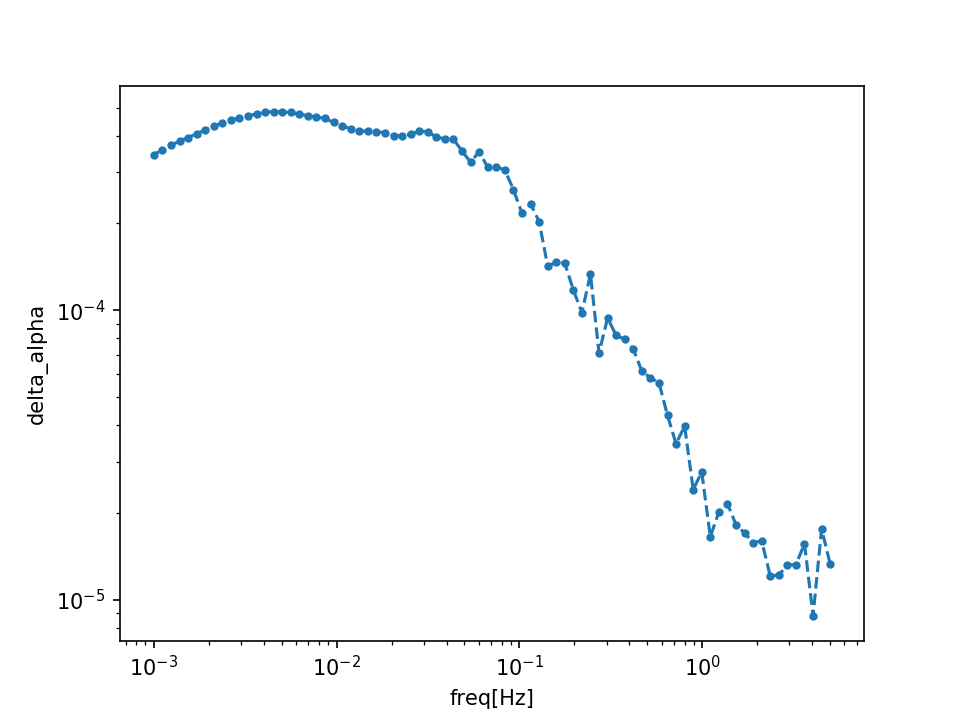

[Text(0, 0.5, 'delta_alpha'), Text(0.5, 0, 'freq[Hz]')]

In [360]:
_, ax = plt.subplots()
ax.loglog(alphas_freq, limit, '.--')
ax.set(xlabel='freq[Hz]', ylabel='delta_alpha')

In [362]:
limits_delta_alpha = 2*np.array(limit)/2 # 2 sigma of delta_alpha over 2 -> because the force is the delta alpha square
mass_ev = alphas_freq/2e14
rho_dm = 0.4*(1.98e-14)**3*(1e9)**4

In [363]:
ge_lim = limits_delta_alpha*mass_ev/np.sqrt(2*rho_dm)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


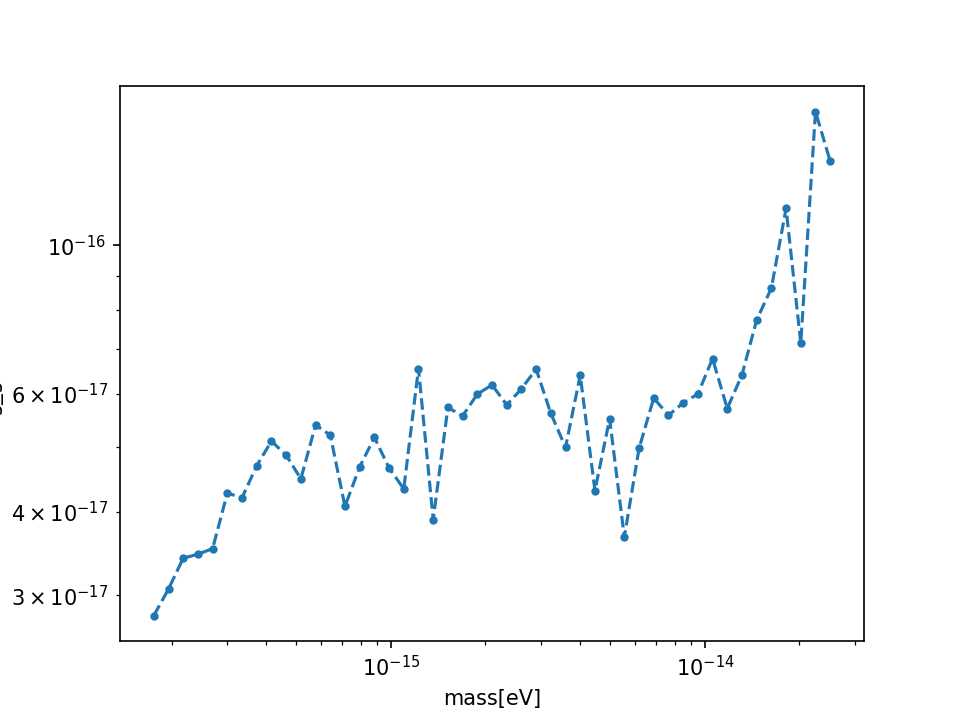

[Text(0, 0.5, 'g_gamma'), Text(0.5, 0, 'mass[eV]')]

In [364]:
_, ax = plt.subplots()
ax.loglog(mass_ev[33:], ge_lim[33:], '.--')
ax.set(xlabel='mass[eV]', ylabel='g_gamma')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


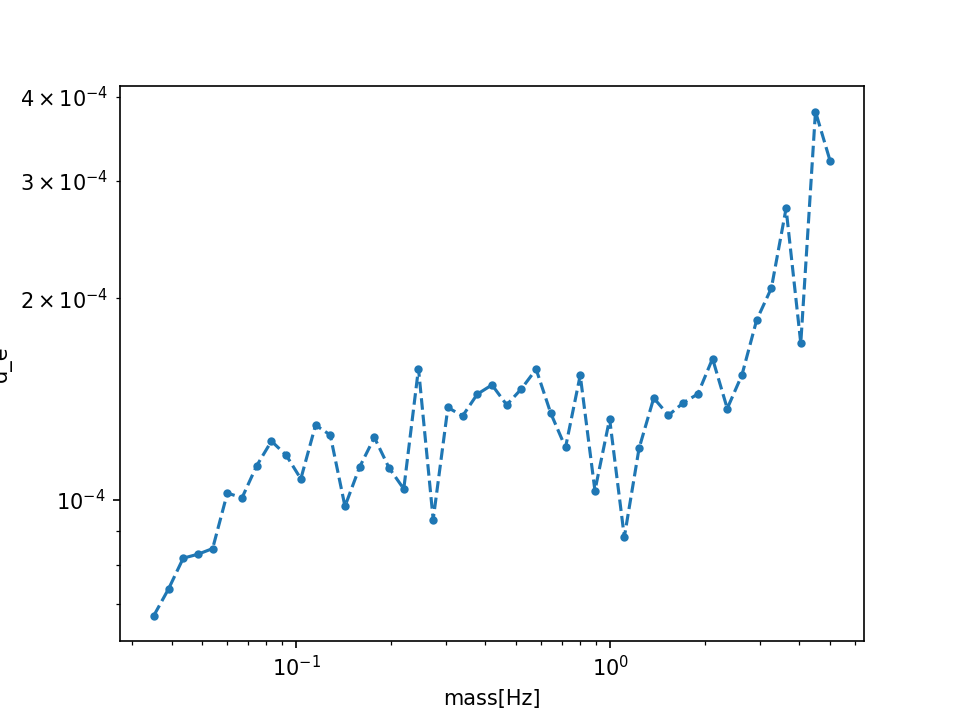

[Text(0, 0.5, 'd_e'), Text(0.5, 0, 'mass[Hz]')]

In [365]:
_, ax = plt.subplots()
ax.loglog(alphas_freq[33:], ge_lim[33:]*2.4e12, '.--')
ax.set(xlabel='mass[Hz]', ylabel='d_e')

<module 'numpy' from '/home/analysis_user/.local/lib/python3.6/site-packages/numpy/__init__.py'>